# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Combine the data into a single DataFrame
merged_mouse_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
merged_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_of_mice = merged_mouse_df["Mouse ID"].nunique()
number_of_mice
#len(merged_mouse_df["Mouse ID"].unique()) works to

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_mouse_df[merged_mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice = duplicate_mice["Mouse ID"].unique()
print(duplicate_mice)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=merged_mouse_df.loc[(merged_mouse_df["Mouse ID"] == "g989")]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = merged_mouse_df.loc[(merged_mouse_df["Mouse ID"] != "g989")]
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_regimen_median = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_regimen_variance = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_regimen_std = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_regimen_sem = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.merge(pd.merge(pd.merge(pd.merge(drug_regimen_mean, drug_regimen_median, on = "Drug Regimen"), 
                                                      drug_regimen_variance, on = "Drug Regimen"), 
                                                      drug_regimen_std, on = "Drug Regimen"), 
                                                      drug_regimen_sem, on = "Drug Regimen")

drug_regimen_df.columns.values[0] = "Mean Tumor Volume"
drug_regimen_df.columns.values[1] = "Median Tumor Volume"
drug_regimen_df.columns.values[2] = "Tumor Volume Variance"
drug_regimen_df.columns.values[3] = "Tumor Volume Std. Dev."
drug_regimen_df.columns.values[4] = "Tumor Volume Std. Err."

drug_regimen_df

C:\Users\lanel\AppData\Local\Temp\ipykernel_5472\2624885914.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  drug_regimen_df = pd.merge(pd.merge(pd.merge(pd.merge(drug_regimen_mean, drug_regimen_median, on = "Drug Regimen"),


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_mice_df = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
aggregated_mice_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#setup
mice_drug_groups = clean_mice_df.groupby("Drug Regimen")
mice_drug_counts = mice_drug_groups[["Timepoint"]].count().sort_values("Timepoint", ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

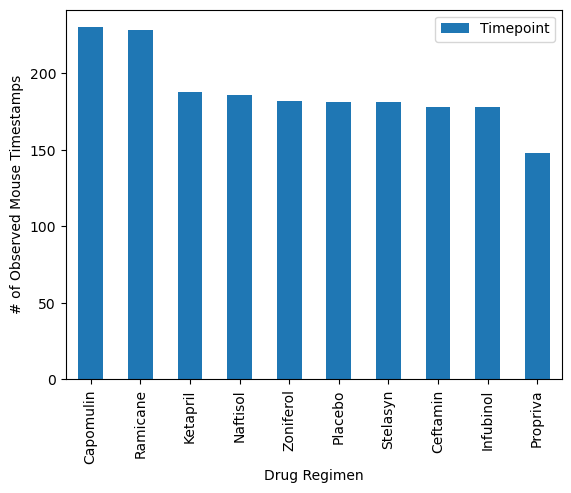

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug_counts.plot(kind = "bar", ylabel = "# of Observed Mouse Timestamps")
plt.show

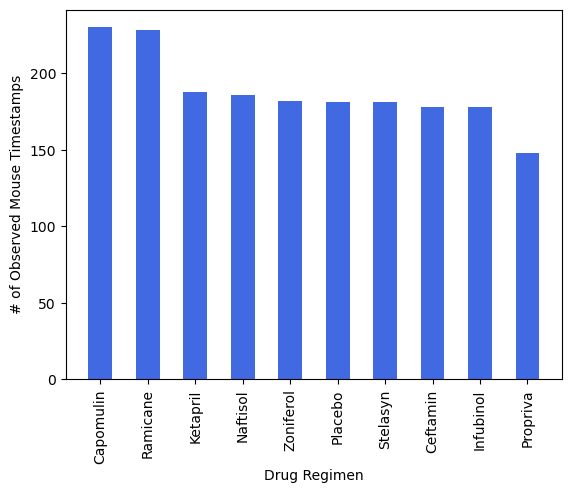

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_drug_counts = mice_drug_counts.reset_index()

drug_regimen_bars = mice_drug_counts["Drug Regimen"]
mouse_timestamps_bars = mice_drug_counts["Timepoint"]

plt.bar(drug_regimen_bars, mouse_timestamps_bars, color="royalblue",  width=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timestamps")
plt.xticks(rotation = "vertical")
plt.show()

In [13]:
#setup
mice_gender_ratio = clean_mice_df.groupby("Sex")[["Mouse ID"]].count()
mice_gender_ratio

,Mouse ID
Sex,
Female,922
Male,958


array([<Axes: ylabel='Mouse ID'>], dtype=object)

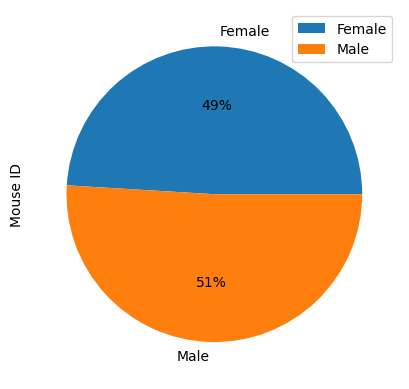

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_ratio.plot(kind = "pie", subplots = True, autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x1df8da65c40>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51%')])

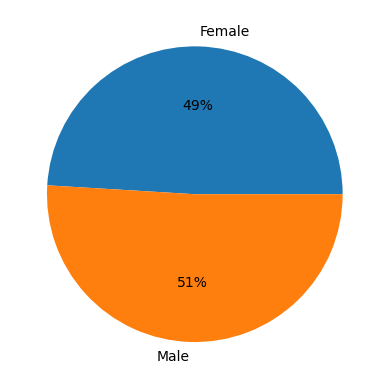

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_ratio = mice_gender_ratio.reset_index()
sizes = mice_gender_ratio["Mouse ID"]
labels = mice_gender_ratio["Sex"]

plt.pie(sizes, labels = labels, autopct='%1.0f%%')

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#filters rows where Drug Regimen equals one of the items in the list options
selective_drug_df = clean_mice_df[clean_mice_df['Drug Regimen'].isin(options)]
selective_drug_df.sort_values("Mouse ID")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1577,a203,35,61.931650,2,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
113,a203,0,45.000000,0,Infubinol,Female,20,23
1315,a203,30,59.523197,1,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1492,z581,35,58.628399,3,Infubinol,Female,24,25
1724,z581,40,60.053740,3,Infubinol,Female,24,25
1342,z581,30,56.286750,2,Infubinol,Female,24,25
721,z581,15,51.196304,2,Infubinol,Female,24,25


In [17]:
# Start by getting the last (greatest) timepoint for each mouse
selective_drug_groups = selective_drug_df.groupby( "Mouse ID")

max_timepoints = selective_drug_groups[["Timepoint"]].max()
max_timepoints.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints_merged = pd.merge(merged_mouse_df, max_timepoints, on=("Mouse ID", "Timepoint"), how = "right")
max_timepoints_merged.sort_values("Mouse ID")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment_names = options

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drug_treatment_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_iter = max_timepoints_merged.loc[max_timepoints_merged["Drug Regimen"] == i, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_list.append(tumor_vol_iter)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_iter.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_iter.loc[(tumor_vol_iter < lower_bound) | 
                                  (tumor_vol_iter > upper_bound)]
    print(f"For {i}, the outliers are: {outliers}")
#dont worry about the number before the 36.321346. thats just the index number for the outlier

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


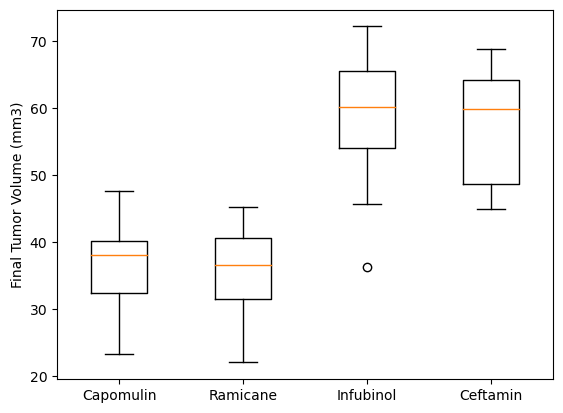

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, labels = drug_treatment_names)
plt.show()

## Line and Scatter Plots

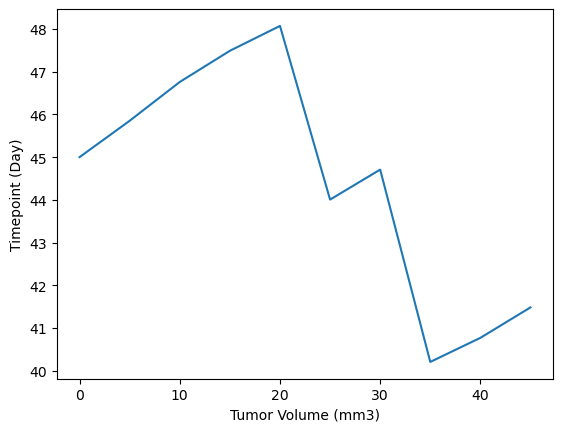

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_regimen = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
mouse_i509 = capomulin_regimen.loc[capomulin_regimen["Mouse ID"] == "l509"]
x_axis = mouse_i509["Timepoint"]
y_axis = mouse_i509["Tumor Volume (mm3)"]
plt.xlabel("Capomulin treatment of Mouse l509")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint (Day)")
plt.plot(x_axis, y_axis)

C:\Users\lanel\AppData\Local\Temp\ipykernel_5472\3801938766.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_regimen_average = capomulin_regimen.groupby(["Mouse ID"]).mean()


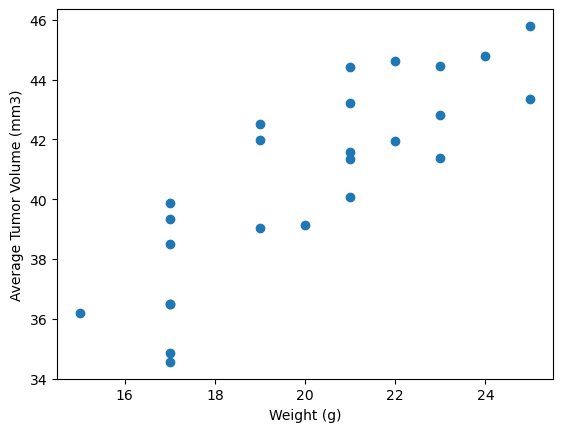

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen_average = capomulin_regimen.groupby(["Mouse ID"]).mean()

x_weight = capomulin_regimen_average["Weight (g)"]
y_tumor = capomulin_regimen_average["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_weight, y_tumor)

## Correlation and Regression

The correlation is 0.84


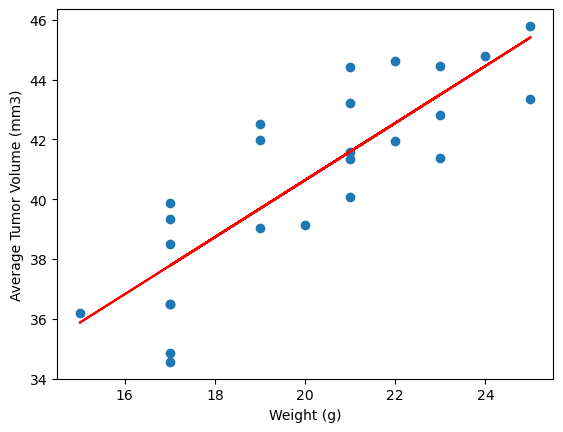

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation Coefficient
pearson_coef = st.pearsonr(x_weight, y_tumor)
print(f"The correlation is {round(pearson_coef[0],2)}")

# Linear Regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_weight, y_tumor)
regress_values = x_weight * slope + intercept

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_weight, y_tumor)
plt.plot(x_weight,regress_values,"r-")
plt.show()